# 1.Project Introduction

The Lending Club credit loan default data is the credit loan situation data of the US online loan platform LendingClub between 2007 and 2015, mainly including loan status and repayment information. Additional attributes include: credit score, address, zip code, state, etc., with a total of 75 attributes (columns) and 890,000 loans (rows).
The loan default prediction model uses Numpy, Pandas, and Sklearn scientific computing packages to complete data cleaning, construct feature engineering, and complete the training of the reservation model. The data visualization uses visualization packages such as Matplotlib and Seaborn.

# 2.Credit data analysis process

Next, we will use the given loan data to do a relatively complete data analysis to further familiarize ourselves with the data analysis process. We will do this in three stages, which are

1.Preliminary analysis and collation of data

2.Exploratory analysis and visualization of data

3.Loan Default Prediction (LogisticRegression)

2.1 Preliminary analysis and arrangement of data

In [1]:
#导入相关库
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')  #风格设置近似R这种的ggplot库

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
#导入数据及预览前三行
data=pd.read_csv("loan.csv")
data.head(3)

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,13,19,25,36,46,48,55,57) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_rcnt_il
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,560.0,0.0,30.0,1,Individual,NaN,0.0,722.0,144904.0,21.0
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,695.0,0.0,NaN,1,Individual,NaN,0.0,0.0,204396.0,19.0
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,700.0,0.0,NaN,1,Joint App,Not Verified,0.0,0.0,189699.0,19.0


In [3]:
data.shape

(1048575, 62)

In [3]:
data.issue_d

0          15-Dec
1          15-Dec
2          15-Dec
3          15-Dec
4          15-Dec
            ...  
1048570    16-Feb
1048571    16-Feb
1048572    16-Feb
1048573    16-Feb
1048574    16-Feb
Name: issue_d, Length: 1048575, dtype: object

In [4]:
#选择2015年度的贷款数据
data_15=data[(data.issue_d=='15-Jan')\
            |(data.issue_d=='15-Feb')\
            |(data.issue_d=='15-Mar')\
            |(data.issue_d=='15-Apr')\
            |(data.issue_d=='15-May')\
            |(data.issue_d=='15-Jun')\
            |(data.issue_d=='15-Jul')\
            |(data.issue_d=='15-Aug')\
            |(data.issue_d=='15-Sep')\
            |(data.issue_d=='15-Oct')\
            |(data.issue_d=='15-Nov')\
            |(data.issue_d=='15-Dec')\
            ]

In [5]:
data_15.shape

(421093, 62)

In [5]:
#统计每列的缺失值情况
check_null = data_15.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data)) #查看缺失值比例

In [6]:
print(check_null[check_null > 0.2]) # 查看缺失比例大于20%的属性。

member_id                      0.401586
desc                           0.401543
verification_status_joint      0.401099
mths_since_rcnt_il             0.381740
next_pymnt_d                   0.358146
mths_since_last_record         0.330618
mths_since_last_major_derog    0.284542
dtype: float64


In [7]:
#删除缺失值超过40%的列
thresh_count = len(data_15)*0.4 # 设定阀值
data_15 = data_15.dropna(thresh=thresh_count, axis=1 ) #若某一列数据缺失的数量超过阀值就会被删除


In [8]:
#按缺失值比例从大到小排列
data_15.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data_15))

mths_since_last_delinq        0.484359
emp_title                     0.056695
emp_length                    0.056560
last_pymnt_d                  0.000698
revol_util                    0.000385
title                         0.000313
last_credit_pull_d            0.000017
dti                           0.000005
total_pymnt_inv               0.000000
total_pymnt                   0.000000
id                            0.000000
total_rec_int                 0.000000
out_prncp_inv                 0.000000
out_prncp                     0.000000
initial_list_status           0.000000
total_acc                     0.000000
total_rec_prncp               0.000000
recoveries                    0.000000
total_rec_late_fee            0.000000
pub_rec                       0.000000
collection_recovery_fee       0.000000
last_pymnt_amnt               0.000000
last_fico_range_high          0.000000
last_fico_range_low           0.000000
collections_12_mths_ex_med    0.000000
policy_code              

View the approximate distribution of data types

In [9]:
data_15.dtypes.value_counts() # 分类统计数据类型

float64    28
object     27
dtype: int64

Use pandas' loc slice method to get a set of arrays with at least 2 categorical features per column

In [10]:
#loc切片得到每列至少有2个分类特征的数组集
data_15 = data_15.loc[:,data_15.apply(pd.Series.nunique)!=1]

View the changes in the data

In [11]:
data_15.dtypes.value_counts()# 分类统计数据类型

float64    28
object     27
dtype: int64

In the above process, the features with many missing values are deleted, and the features with missing values will be processed below.

2.1.2 Missing value handling

Missing values of type "Object" and "float64" are handled differently, so they are handled separately.

First deal with missing values of 'Object' categorical variable

In [12]:
#便于理解将变量命设置为loans
loans=data_15
loans.shape

(421093, 55)

In [13]:
#初步了解“Object”变量概况
pd.set_option('display.max_rows',None)
loans.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
id,421093,421093,62914563,1
term,421093,2,36 months,283172
grade,421093,7,C,120566
sub_grade,421093,35,C1,26434
emp_title,397219,120809,Teacher,8070
emp_length,397276,11,10+ years,141521
home_ownership,421093,4,MORTGAGE,207683
annual_inc,421093.0,28590.0,60000.0,15165.0
verification_status,421093,3,Source Verified,184768
issue_d,421093,12,15-Oct,48631


In [14]:
#查看“Object”分类变量缺失值概况。
objectColumns = loans.select_dtypes(include=["object"]).columns
loans[objectColumns].isnull().sum().sort_values(ascending=False)

emp_title                  23874
emp_length                 23817
last_pymnt_d                 294
title                        132
last_credit_pull_d             7
id                             0
zip_code                       0
policy_code                    0
last_pymnt_amnt                0
collection_recovery_fee        0
initial_list_status            0
total_acc                      0
earliest_cr_line               0
delinq_2yrs                    0
addr_state                     0
purpose                        0
term                           0
url                            0
pymnt_plan                     0
loan_status                    0
issue_d                        0
verification_status            0
annual_inc                     0
home_ownership                 0
sub_grade                      0
grade                          0
application_type               0
dtype: int64

In [15]:
#使用‘unknown’来填充缺失值
objectColumns = loans.select_dtypes(include=["object"]).columns # 筛选数据类型为object的数据
loans[objectColumns] = loans[objectColumns].fillna("Unknown") #以分类“Unknown”填充缺失值

In [16]:
#查看“Object”分类变量缺失值情况
loans[objectColumns].isnull().sum().sort_values(ascending=False)

id                         0
title                      0
policy_code                0
last_credit_pull_d         0
last_pymnt_amnt            0
last_pymnt_d               0
collection_recovery_fee    0
initial_list_status        0
total_acc                  0
earliest_cr_line           0
delinq_2yrs                0
addr_state                 0
zip_code                   0
purpose                    0
term                       0
url                        0
pymnt_plan                 0
loan_status                0
issue_d                    0
verification_status        0
annual_inc                 0
home_ownership             0
emp_length                 0
emp_title                  0
sub_grade                  0
grade                      0
application_type           0
dtype: int64

Handling missing values for "float64" numeric variables

In [17]:
loans.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False)

mths_since_last_delinq        203960
revol_util                       162
dti                                2
loan_amnt                          0
total_pymnt                        0
tot_coll_amt                       0
acc_now_delinq                     0
collections_12_mths_ex_med         0
last_fico_range_low                0
last_fico_range_high               0
last_pymnt_amnt                    0
recoveries                         0
total_rec_late_fee                 0
total_rec_int                      0
total_rec_prncp                    0
total_pymnt_inv                    0
out_prncp                          0
out_prncp_inv                      0
funded_amnt                        0
revol_bal                          0
pub_rec                            0
open_acc                           0
inq_last_6mths                     0
fico_range_high                    0
fico_range_low                     0
installment                        0
int_rate                           0
f

In [18]:

#利用sklearn模块中的Imputer模块填充缺失值
numColumns = loans.select_dtypes(include=[np.number]).columns
from sklearn.impute import SimpleImputer
imr = SimpleImputer( strategy='mean')  # 针对axis=0 列来处理
imr = imr.fit(loans[numColumns])
loans[numColumns] = imr.transform(loans[numColumns])

In [19]:
loans.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False)

loan_amnt                     0
out_prncp_inv                 0
tot_coll_amt                  0
acc_now_delinq                0
collections_12_mths_ex_med    0
last_fico_range_low           0
last_fico_range_high          0
last_pymnt_amnt               0
recoveries                    0
total_rec_late_fee            0
total_rec_int                 0
total_rec_prncp               0
total_pymnt_inv               0
total_pymnt                   0
out_prncp                     0
funded_amnt                   0
revol_util                    0
revol_bal                     0
pub_rec                       0
open_acc                      0
mths_since_last_delinq        0
inq_last_6mths                0
fico_range_high               0
fico_range_low                0
dti                           0
installment                   0
int_rate                      0
funded_amnt_inv               0
tot_cur_bal                   0
dtype: int64

2.1.3 Data filtering

The purpose of this model is to predict the loan default of platform users, so it is necessary to filter out some information that has an impact on user default, and other irrelevant redundant information needs to be deleted.

First view all category tags

In [20]:
loans.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal'],
      dtype='object')

In [21]:
#删除对模型没有意义的列
loans2=loans.drop(['sub_grade', 'emp_title',  'title', 'zip_code', 'addr_state','url'], axis=1, inplace = True)


In [22]:
loans3=loans.drop(['issue_d', 'pymnt_plan',  'earliest_cr_line', 'initial_list_status', 'last_pymnt_d','last_credit_pull_d'], axis=1, inplace = True)


In [23]:
loans4=loans.drop(['id','annual_inc','delinq_2yrs',
       'total_acc', 'collection_recovery_fee',
       'policy_code',], axis=1, inplace = True)

In [24]:
object_columns_df3 =loans.select_dtypes(include=["object"]) #筛选数据类型为object的变量
print(object_columns_df3.columns)

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'application_type'],
      dtype='object')


2.2 Exploratory analysis and visualization of data

After data preprocessing, the next step is to explore the feature engineering of the data to prepare for the subsequent default prediction model.

Feature engineering is the most important part of machine learning. It is hoped that the features to be found are closest to the actual business scenario. Therefore, to repeatedly find features, only the least features are needed to obtain a simple model with the best prediction effect.

This section divides feature engineering into three main parts: feature abstraction, feature scaling, and feature selection

2.2.1 Feature abstraction

There are many categorical variables of the "Object" type in the dataset, but for such variables, the machine learning algorithm cannot recognize them, and it needs to be converted into a data type that the algorithm can recognize.

First for "loan_status" data type conversion

In [25]:
#统计"loan_status"数据的分布
loans['loan_status'].value_counts()

Fully Paid            299741
Charged Off            75802
Current                43299
Late (31-120 days)      1359
In Grace Period          612
Late (16-30 days)        279
Default                    1
Name: loan_status, dtype: int64

Code the default in the above table as 1 and the normal as 0.

In [26]:
#使用Pandas replace函数定义新函数：
def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
    return colCoded

#把贷款状态LoanStatus编码为违约=1, 正常=0:
pd.value_counts(loans["loan_status"])
loans["loan_status"] = coding(loans["loan_status"], {'Current':0,'Fully Paid':0\
                                                     ,'In Grace Period':1\
                                                     ,'Late (31-120 days)':1\
                                                     ,'Late (16-30 days)':1\
                                                     ,'Charged Off':1\
                                                     ,"Issued":1\
                                                     ,"Default":1\
                                                    ,"Does not meet the credit policy. Status:Fully Paid":1\
                                         ,"Does not meet the credit policy. Status:Charged Off":1})

print( '\nAfter Coding:')
pd.value_counts(loans["loan_status"])


After Coding:


0    343040
1     78053
Name: loan_status, dtype: int64

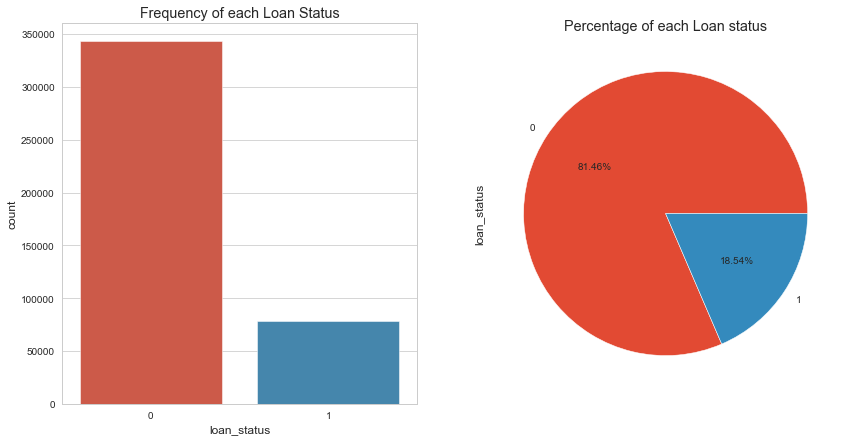

In [27]:
# 贷款状态分布可视化
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=loans,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loans['loan_status'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

Variables "emp_length", "grade" for feature abstraction

In [28]:
# 构建mapping，对有序变量"emp_length”、“grade”进行转换
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "Unknown": 0
    },
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    }
}

loans = loans.replace(mapping_dict) #变量映射
loans[['emp_length','grade']].head() #查看效果

,emp_length,grade
0,10,3
1,10,3
2,10,2
3,10,3
4,3,6


Variables "home_ownership", "verification_status", "application_type", "purpose", "term" hot coding

In [29]:
#变量狂热编码
n_columns = ["home_ownership", "verification_status", "application_type","purpose", "term"] 
dummy_df = pd.get_dummies(loans[n_columns])# 用get_dummies进行one hot编码
loans = pd.concat([loans, dummy_df], axis=1) #当axis = 1的时候，concat就是行对齐，然后将不同列名称的两张表合并
loans = loans.drop(n_columns, axis=1)  #清除原来的分类变量

In [30]:
loans.info() #查看数据信息

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421093 entries, 0 to 421094
Data columns (total 57 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            421093 non-null  float64
 1   funded_amnt                          421093 non-null  float64
 2   funded_amnt_inv                      421093 non-null  float64
 3   int_rate                             421093 non-null  float64
 4   installment                          421093 non-null  float64
 5   grade                                421093 non-null  int64  
 6   emp_length                           421093 non-null  int64  
 7   loan_status                          421093 non-null  int64  
 8   dti                                  421093 non-null  float64
 9   fico_range_low                       421093 non-null  float64
 10  fico_range_high                      421093 non-null  float64
 11  inq_last_6mth

2.2.2 Feature scaling

The standardized method is used for de-dimensioning operations to speed up the algorithm convergence speed, and the StandardScaler, a sub-module of the scikit-learn module preprocessing, is used for operation.

In [31]:
col = loans.select_dtypes(include=['int64','float64']).columns
col = col.drop('loan_status') #剔除目标变量
loans_ml_df = loans # 复制数据至变量loans_ml_df


from sklearn.preprocessing import StandardScaler # 导入模块
sc =StandardScaler() # 初始化缩放器
loans_ml_df[col] =sc.fit_transform(loans_ml_df[col]) #对数据进行标准化
loans_ml_df.head() #查看经标准化后的数据

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,loan_status,dti,fico_range_low,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,-1.358056,-1.358056,-1.357878,0.322007,-1.302095,0.170524,1.117113,0,-1.489951,-0.618981,...,0,0,0,0,0,0,0,0,1,0
1,1.103643,1.103643,1.104795,-0.141086,1.545606,0.170524,1.117113,0,-0.347587,0.708602,...,0,0,0,0,0,1,0,0,1,0
2,0.555303,0.555303,0.556238,-0.421258,-0.037507,-0.596573,1.117113,0,-0.941842,0.044811,...,0,0,0,0,0,0,0,0,0,1
3,2.305326,2.305326,2.306953,0.521137,1.584896,0.170524,1.117113,0,-0.235039,3.031871,...,0,0,0,0,0,0,0,0,0,1
4,-0.564712,-0.564712,-0.564220,2.280892,-0.620525,2.471816,-0.695164,0,0.700236,0.044811,...,1,0,0,0,0,0,0,0,0,1


The above process completes the abstraction of non-numerical features, so that the algorithm can understand the data in the data set, so many features, which features have a greater impact on the prediction results, so the following features are selected by the size of the impact.

2.2.3 Feature selection

The selection of features gives priority to the features with high correlation with the prediction target, and irrelevant features may reduce the accuracy of classification. Therefore, in order to enhance the generalization ability of the model, we need to select the best partial features from the original feature set. , and reduce the difficulty of learning, which can simplify the calculation of the classifier and help to understand the causal relationship of the classification problem.

Generally speaking, according to the idea of ​​feature selection, feature selection is divided into three methods: embedded approach, filter approach, and wrapper approacch.

Filter approach: Select features by the correlation between independent variables or between independent variables and target variables.
Embedded approach: features are automatically selected by the learner itself.
Wrapper method (wrapper approacch): Determine whether to add a variable through the objective function (AUC/MSE).
This project uses a combination of Filter, Embedded and Wrapper for feature selection.

First extract the loan status 'loan_status' in the dataset

In [40]:
#构建X特征变量和Y目标变量
x_feature = list(loans_ml_df.columns)
x_feature.remove('loan_status')
x_val = loans_ml_df[x_feature]
y_val = loans_ml_df['loan_status']
len(x_feature) # 查看初始特征集合的数量

56

In [36]:
x_val.describe().T # 初览数据

,count,mean,std,min,25%,50%,75%,max
loan_amnt,421093.0,-1.283821e-14,1.000001,-1.661393,-0.786382,-1.447064e-01,5.553028e-01,2.305326
funded_amnt,421093.0,-1.283821e-14,1.000001,-1.661393,-0.786382,-1.447064e-01,5.553028e-01,2.305326
funded_amnt_inv,421093.0,2.569063e-16,1.000001,-1.673007,-0.785977,-1.440483e-01,5.562379e-01,2.306953
int_rate,421093.0,-1.803124e-14,1.000001,-1.685503,-0.794048,-7.162230e-02,6.924817e-01,3.795207
installment,421093.0,-8.817872e-16,1.000001,-1.747353,-0.726633,-2.304854e-01,5.593150e-01,4.098959
grade,421093.0,7.897279e-14,1.000001,-1.363671,-0.596573,1.705240e-01,9.376213e-01,3.238913
emp_length,421093.0,-9.592708e-16,1.000001,-1.471854,-0.954060,8.152647e-02,1.117113e+00,1.117113
dti,421093.0,3.599416e-16,1.000001,-2.155111,-0.738129,-6.171480e-02,6.968599e-01,110.280515
fico_range_low,421093.0,-1.329321e-14,1.000001,-1.116824,-0.784928,-2.870850e-01,5.426540e-01,5.023244
fico_range_high,421093.0,4.329041e-15,1.000001,-1.116804,-0.784916,-2.870831e-01,5.426378e-01,5.056319


Wrapper method

Select the features with high correlation with the target variable. The 30 features with the strongest correlation with the target variable are screened by the brute force recursive feature elimination (Recursive Feature Elimination) method, and the feature dimension is reduced from 59 to 30.

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# 建立逻辑回归分类器
model = LogisticRegression()
# 建立递归特征消除筛选器
rfe=RFE(estimator=model,n_features_to_select=30,step=1) #通过递归选择特征，选择30个特征
rfe = rfe.fit(x_val, y_val)
# 打印筛选结果
print(rfe.support_)
print(rfe.ranking_) #ranking 为 1代表被选中，其他则未被代表未被选中

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[ True  True  True  True  True False False False False False False False
 False False False False  True  True  True  True  True  True  True  True
  True  True False False False False False False  True  True  True  True
  True  True  True  True False False False False  True  True False  True
 False False  True  True  True False False  True]
[ 1  1  1  1  1 15 10 19 13 11 23  9 25 12 24  7  1  1  1  1  1  1  1  1
  1  1  6 17 18 22 14 27  1  1  1  1  1  1  1  1  2  3  4 26  1  1 16  1
 21  5  1  1  1 20  8  1]


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
col_filter = x_val.columns[rfe.support_] #通过布尔值筛选首次降维后的变量
col_filter # 查看通过递归特征消除法筛选的变量

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'last_fico_range_high', 'home_ownership_MORTGAGE', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_Individual', 'application_type_Joint App',
       'purpose_home_improvement', 'purpose_house', 'purpose_medical',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'term_ 60 months'],
      dtype='object')

Filter method

Under normal circumstances, the factors affecting the target variable are diverse; but different factors will affect each other (collinearity), or overlap, thereby affecting the authenticity of the statistical results. Next, the redundant features are found and eliminated through the Pearson correlation map, and the direction of the features is further guided by the correlation map.

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

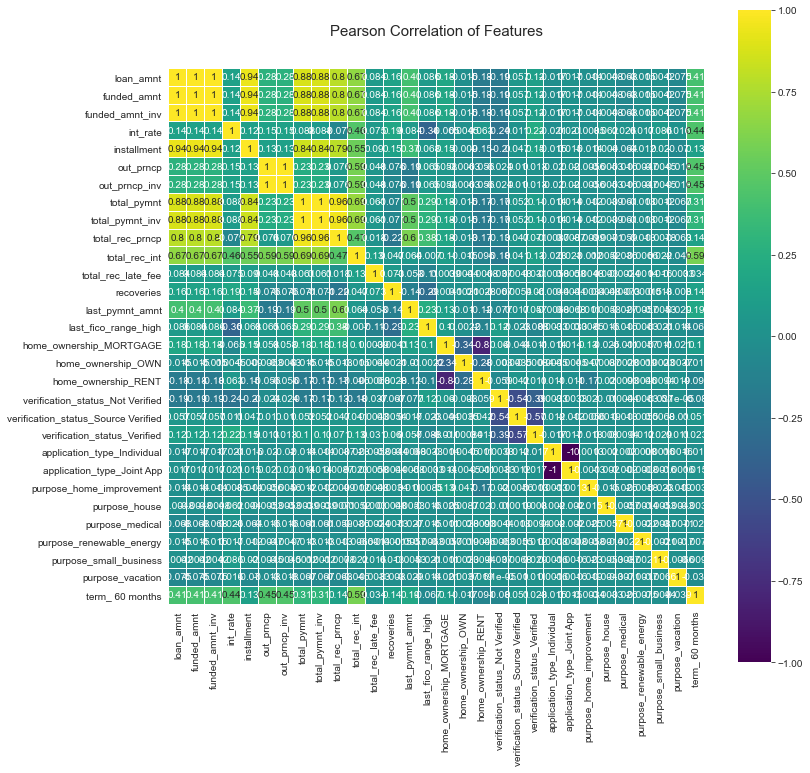

In [43]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(loans_ml_df[col_filter].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [44]:
drop_col = ['funded_amnt', 'funded_amnt_inv','installment', 'out_prncp', 'out_prncp_inv',
                       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'home_ownership_OWN',
                       'application_type_Joint App',  'home_ownership_RENT'
            , 'total_pymnt', 'verification_status_Source Verified','int_rate']
col_new = col_filter.drop(drop_col) #剔除冗余特征
print(len(col_new))

16


In [45]:
col_new

Index(['loan_amnt', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'last_fico_range_high', 'home_ownership_MORTGAGE',
       'verification_status_Not Verified', 'verification_status_Verified',
       'application_type_Individual', 'purpose_home_improvement',
       'purpose_house', 'purpose_medical', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'term_ 60 months'],
      dtype='object')

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

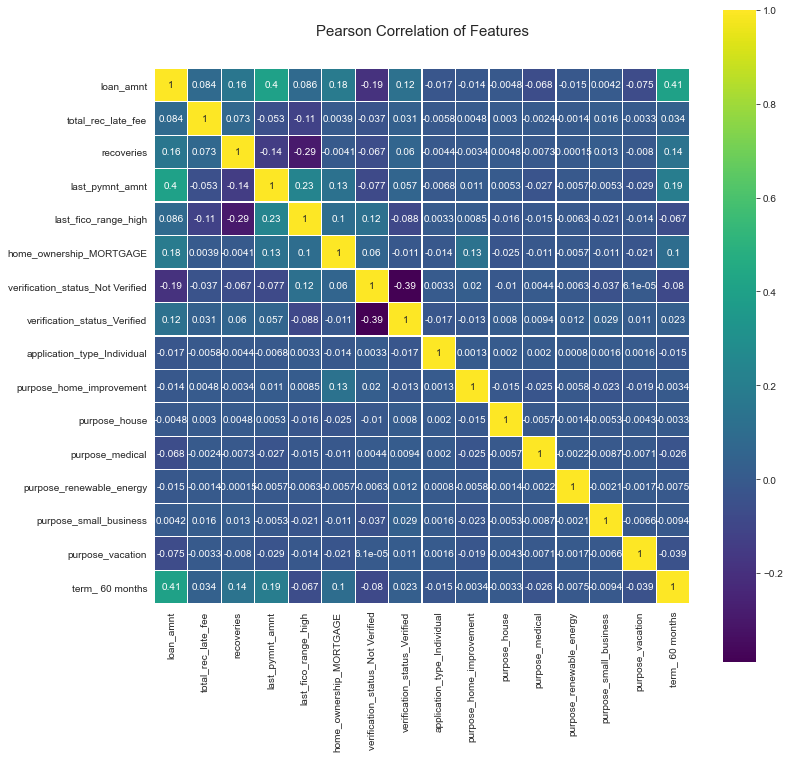

In [46]:
col_new # 查看剩余的特征
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(loans_ml_df[col_new].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Embedded method

In order to understand the influence of each feature on loan default prediction, before model training, we need to have a correct evaluation and ranking of the weight of the features, and then we can use the feature importance ranking to mine which variables are more important. Reduce the difficulty of learning and finally achieve the purpose of optimizing the model calculation

In [47]:
#随机森林算法判定特征的重要性
names = loans_ml_df[col_new].columns
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,random_state=123)#构建分类随机森林分类器
clf.fit(x_val[col_new], y_val) #对自变量和因变量进行拟合
names, clf.feature_importances_
for feature in zip(names, clf.feature_importances_):
    print(feature)

('loan_amnt', 0.04830599901943122)
('total_rec_late_fee', 0.011617298579091353)
('recoveries', 0.43000108089256184)
('last_pymnt_amnt', 0.19573671416046484)
('last_fico_range_high', 0.2887052877092712)
('home_ownership_MORTGAGE', 0.0031575843964935764)
('verification_status_Not Verified', 0.0026965581788787494)
('verification_status_Verified', 0.003164243403642067)
('application_type_Individual', 0.00012200008777372206)
('purpose_home_improvement', 0.0016710756033522425)
('purpose_house', 0.00030909584902226396)
('purpose_medical', 0.000688936041468071)
('purpose_renewable_energy', 8.337325123455814e-05)
('purpose_small_business', 0.0006151032914457732)
('purpose_vacation', 0.0003494460295032755)
('term_ 60 months', 0.012776203506365233)


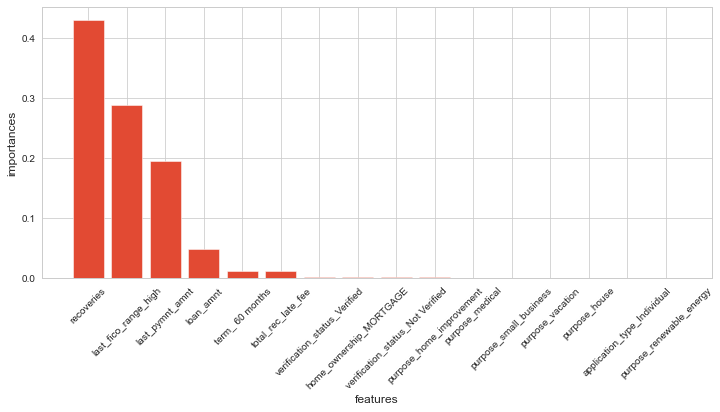

In [48]:
importance = pd.Series(clf.feature_importances_,index = names)
importance = importance.sort_values(ascending = False)
fig = plt.figure(figsize=(12,5))
plt.bar(importance.index,importance.values)
plt.xlabel('features')
plt.ylabel('importances')
plt.xticks(rotation=45)

plt.show()


The feature importance is sorted from largest to smallest and the graph is visualized. It turns out that the most discriminative feature is the total amount of last payment received 'recoveries'

# 2.3 Loan Default Prediction Model (LogisticRegression)

2.3.1 Sample Imbalance Handling

In this project, the proportion of borrowers who defaulted on the loan platform in 2015 was very low, about 18.54%, and the positive and negative sample sizes were very unbalanced. There are two common solutions for unbalanced samples:

Oversampling, adding positive samples to make the number of positive and negative samples close, and then learning.

Undersampling, remove some negative samples to make the number of positive and negative samples close, and then learn. Build independent and dependent variables

In [49]:
X = loans_ml_df[col_new]
y = loans_ml_df["loan_status"]
n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
n_pos_sample / n_sample,
n_neg_sample / n_sample))
print('特征维数：', X.shape[1])

样本个数：421093; 正样本占81.46%; 负样本占18.54%
特征维数： 16


In [51]:
from imblearn.over_sampling import SMOTE # 导入SMOTE算法模块
# 处理不平衡数据
sm = SMOTE(random_state=42)    # 处理过采样的方法
X, y = sm.fit_resample(X, y)
print('通过SMOTE方法平衡正负样本后')
n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))


通过SMOTE方法平衡正负样本后
样本个数：686080; 正样本占50.00%; 负样本占50.00%


2.3.2 Model training

Training with a logistic regression classifier

In [52]:
# 构建逻辑回归分类器
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression() 
clf1.fit(X, y)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
predicted1 = clf.predict(X) # 通过分类器产生预测结果
from sklearn.metrics import accuracy_score
print("Test set accuracy score: {:.5f}".format(accuracy_score(predicted1, y,)))

Test set accuracy score: 0.96416


In [54]:
#生成混淆矩阵
from sklearn.metrics import confusion_matrix
confusion_matrix(y, predicted1)

array([[342649,    391],
       [ 24200, 318840]], dtype=int64)

In [66]:
m = confusion_matrix(y, predicted1)
df = pd.DataFrame(m,index=['0','1'],columns=["0","1"])
df

,0,1
0,342649,391
1,24200,318840


<AxesSubplot:>

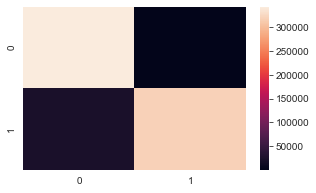

In [67]:
# 混淆矩阵可视化

plt.figure(figsize=(5,3))
sns.heatmap(df)

In [68]:
#查看precision、recall、f1-score的值
from sklearn.metrics import classification_report
print(classification_report(y, predicted1))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97    343040
           1       1.00      0.93      0.96    343040

    accuracy                           0.96    686080
   macro avg       0.97      0.96      0.96    686080
weighted avg       0.97      0.96      0.96    686080



In [69]:
#计算ROC值
from sklearn.metrics import roc_auc_score
roc_auc1 = roc_auc_score(y, predicted1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.964157


# 3. Summary

This paper completes the credit default prediction model based on the 2015 loan data of the Internet financial platform. The full text includes data cleaning, construction of feature engineering, and training of the model. The final model has an accuracy rate of 0.79 and a recall rate of 0.96, which has good predictability. , the model in this paper can be used as a reference for credit platforms to predict default borrowers